# 📘 **Day 6: Understanding API Response Structures (Headers, Status, JSON Depth)**

---

## 🛠️ Part 1: Play with a Simple API

Use the same endpoint:

In [1]:
import requests

url = "https://jsonplaceholder.typicode.com/posts/1"
response = requests.get(url)

In [20]:
print(response.status_code)     # Should be 200

if response.ok:
    print("All good!")

response.raise_for_status()

200
All good!


In [19]:
print(response.headers)         # Dictionary of headers
print(response.text)            # Raw response text (string)
print(response.json())          # Parsed JSON object (dict)

{'Date': 'Fri, 25 Jul 2025 11:10:32 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'max-age=43200', 'Etag': 'W/"124-yiKdLzqO5gfBrJFrcdJ8Yq0LGnU"', 'Expires': '-1', 'Nel': '{"report_to":"heroku-nel","response_headers":["Via"],"max_age":3600,"success_fraction":0.01,"failure_fraction":0.1}', 'Pragma': 'no-cache', 'Report-To': '{"group":"heroku-nel","endpoints":[{"url":"https://nel.heroku.com/reports?s=4GuDFU%2B7BO7J7EIZVs2yY0YcW8cMdsSD95%2BsSNhi0GE%3D\\u0026sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d\\u0026ts=1752634633"}],"max_age":3600}', 'Reporting-Endpoints': 'heroku-nel="https://nel.heroku.com/reports?s=4GuDFU%2B7BO7J7EIZVs2yY0YcW8cMdsSD95%2BsSNhi0GE%3D&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&ts=1752634633"', 'Server': 'cloudflare', 'Vary': 'Origin, Accept-Encoding', 'Via': '2.0 heroku-router', 'X-Content-Type-Options': 'nosniff', 'X-Powered-By': 'Express',

In [15]:
print(type(response.text))   # <class 'str'>
print(type(response.json())) # <class 'dict'>


<class 'str'>
<class 'dict'>


In [ ]:
print(response.elapsed.total_seconds())

0.358103


---

## 🧪 Part 2: Make an Invalid Request:


In [22]:
bad_response = requests.get("https://jsonplaceholder.typicode.com/invalid_url")

print(bad_response.status_code)  # Should be 404
bad_response.raise_for_status

404


<bound method Response.raise_for_status of <Response [404]>>

In [11]:
print(bad_response.json())
print(bad_response.text)
print(bad_response.headers)

{}
{}
{'Date': 'Fri, 25 Jul 2025 11:14:25 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Credentials': 'true', 'Cache-Control': 'max-age=43200', 'Etag': 'W/"2-vyGp6PvFo4RvsFtPoIWeCReyIC8"', 'Expires': '-1', 'Nel': '{"report_to":"heroku-nel","response_headers":["Via"],"max_age":3600,"success_fraction":0.01,"failure_fraction":0.1}', 'Pragma': 'no-cache', 'Report-To': '{"group":"heroku-nel","endpoints":[{"url":"https://nel.heroku.com/reports?s=z95AZInd%2BPnpi0rERcE2qKtOIVoDvmnpn2CcvIr3cjA%3D\\u0026sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d\\u0026ts=1753442065"}],"max_age":3600}', 'Reporting-Endpoints': 'heroku-nel="https://nel.heroku.com/reports?s=z95AZInd%2BPnpi0rERcE2qKtOIVoDvmnpn2CcvIr3cjA%3D&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&ts=1753442065"', 'Server': 'cloudflare', 'Vary': 'Origin, Accept-Encoding', 'Via': '2.0 heroku-router', 'X-Content-Type-Options': 'nosniff', 'X-Powered-By': 'Express',

---

## 🔍 Part 3: Analyze Nested JSON

In [14]:
users = requests.get("https://jsonplaceholder.typicode.com/users").json()

print(users[0])                # First user
print(users[0]['address'])     # Nested dict
print(users[0]['address']['geo'])  # More nested
print(users[0]['address']['geo']['lng'])


{'id': 1, 'name': 'Leanne Graham', 'username': 'Bret', 'email': 'Sincere@april.biz', 'address': {'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}, 'phone': '1-770-736-8031 x56442', 'website': 'hildegard.org', 'company': {'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}}
{'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}
{'lat': '-37.3159', 'lng': '81.1496'}
81.1496


---

## 🔍 Where do API headers come from?

#### ➤ The headers (like `Authorization`, `Accept`, `Content-Type`) come from:

- **API documentation** (official source)
- The specific **endpoint you're using** (some need auth, some don't)
- The **type of request** (GET vs POST vs PUT, etc.)

#### 🧠 How to Know Which Header to Use?

##### ✅ 1. **Check the API Documentation**

Every good API (like GitHub, OpenWeather, NewsAPI, etc.) provides:

- Base URL
- Required headers
- Example curl or Python requests
- Optional parameters

##### ✅ 2. **Common Headers and When to Use Them**

| Header | Use Case | Example Value |
| --- | --- | --- |
| `Authorization` | When an API needs login/authentication | `Bearer <token>` |
| `Content-Type` | For POST requests — tells server the format of data sent | `application/json`, `application/x-www-form-urlencoded` |
| `Accept` | Tell server what format you expect in return | `application/json`, `text/html` |
| `User-Agent` | Identifies the client; some APIs require it | `MyApp/1.0` or `Mozilla/5.0` |

##### ✅ 3. **If Not Specified, Try These Defaults:**

```python
headers = {
    "Accept": "application/json",
    "Content-Type": "application/json"
}
```

Then, add others like `Authorization` only when the API says it’s required.

![Screenshot 2025-08-05 171025.png](<attachment:Screenshot 2025-08-05 171025.png>)
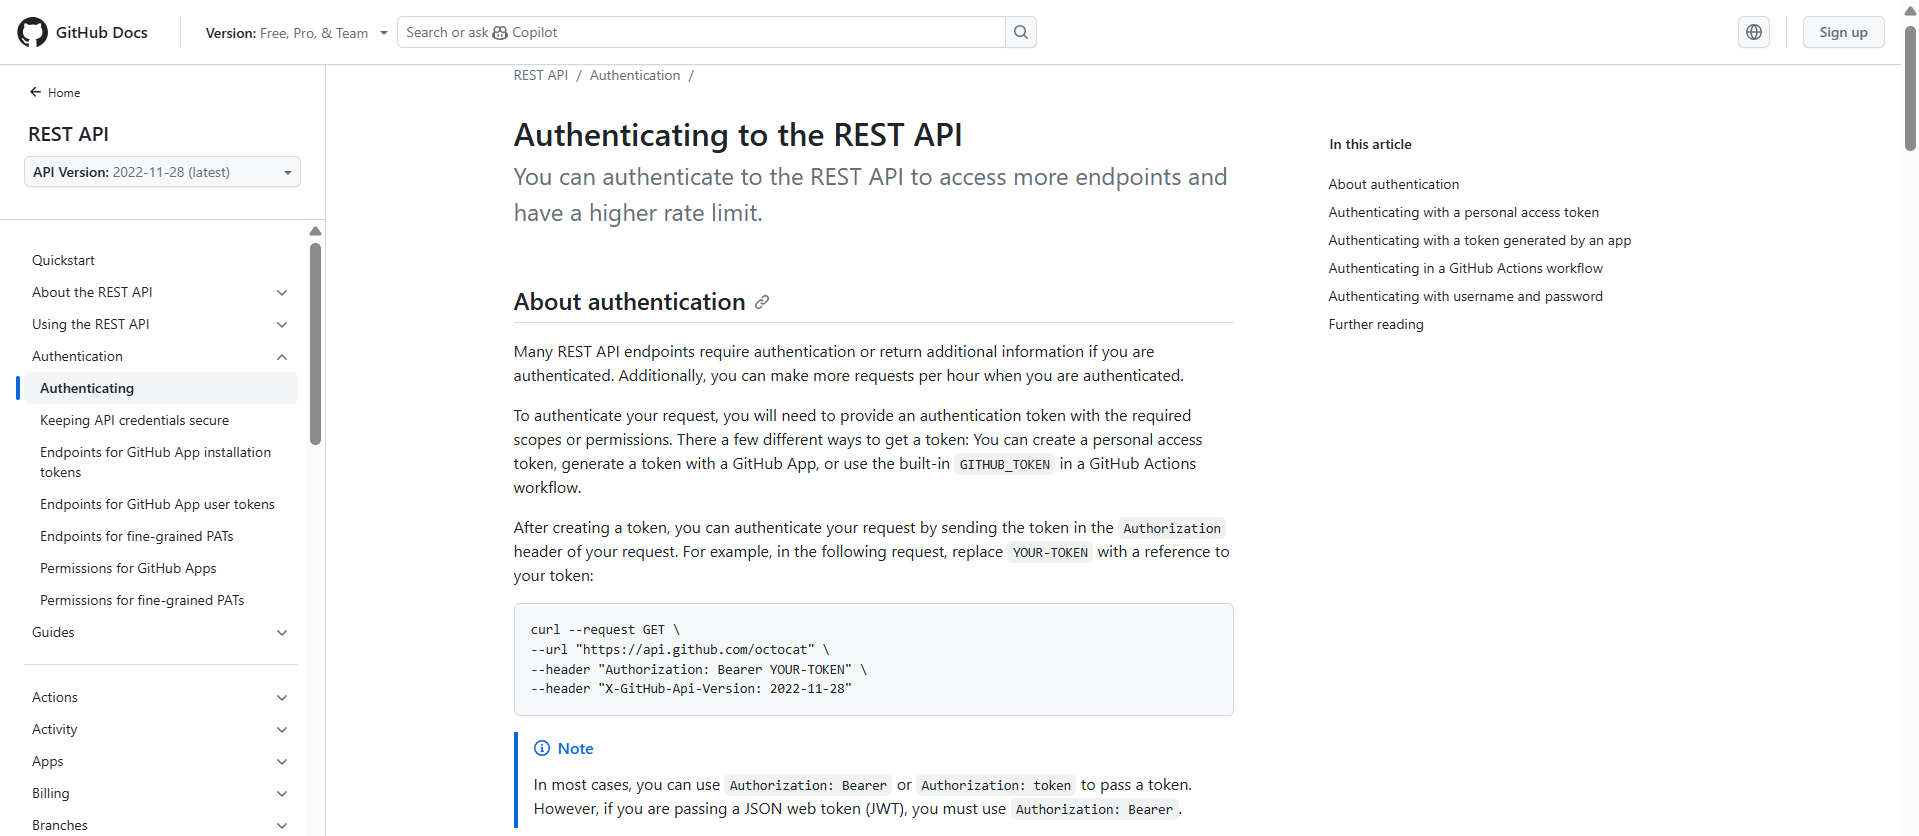

![Screenshot 2025-08-05 171139.png](<attachment:Screenshot 2025-08-05 171139.png>)
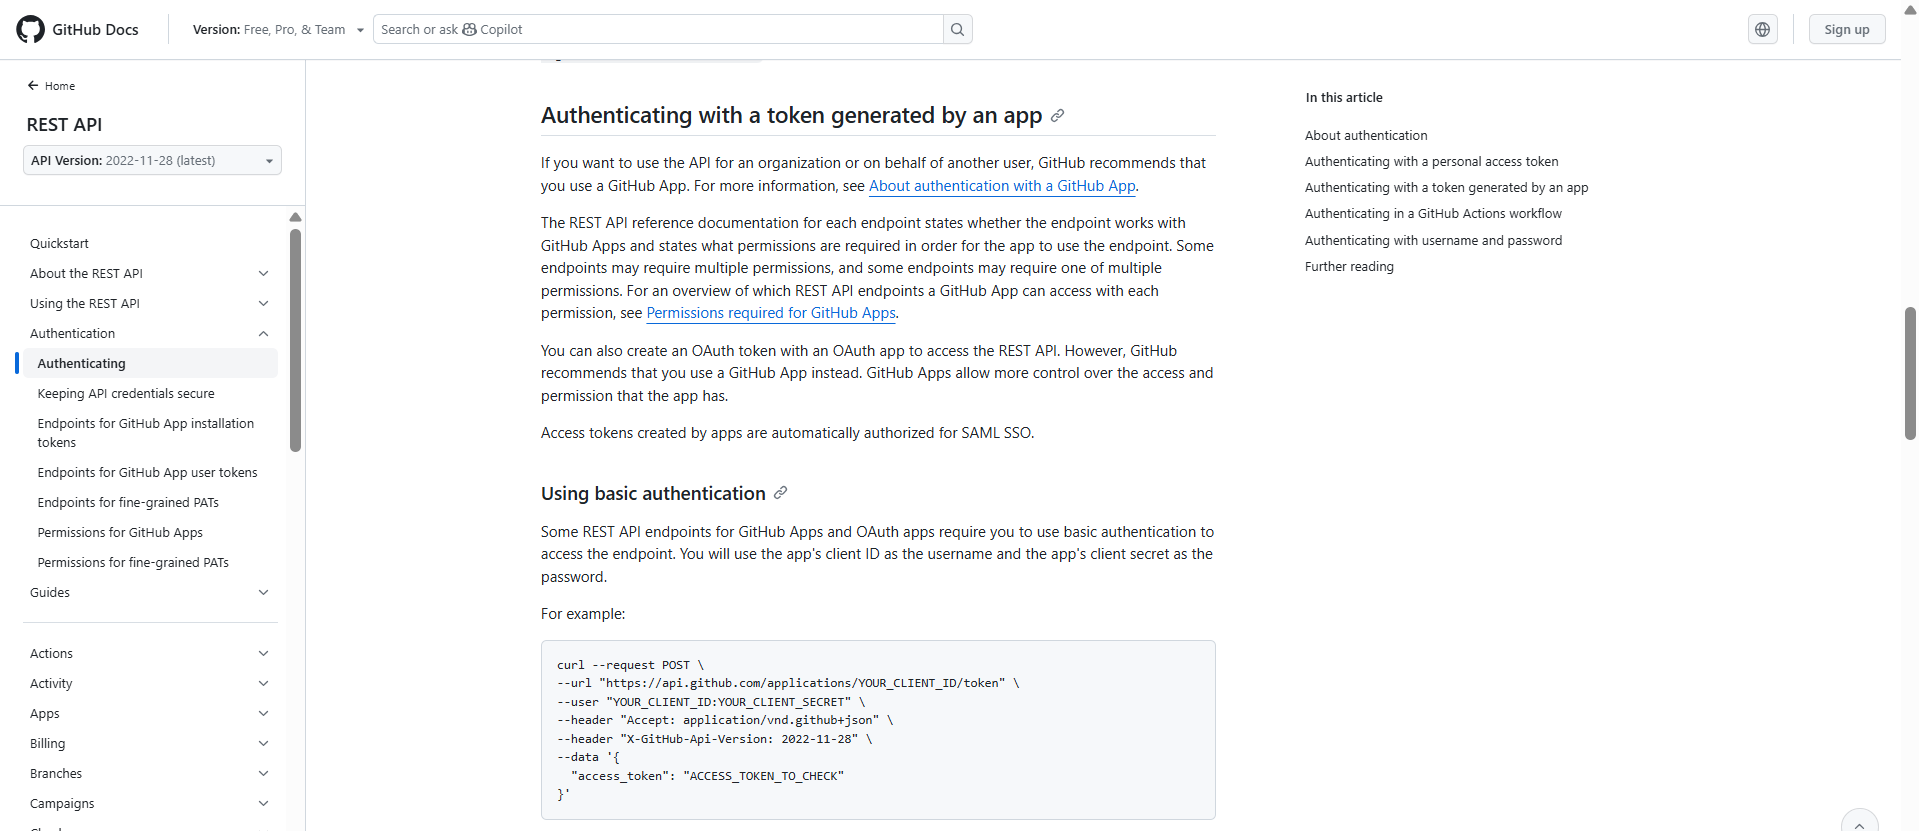

---

### Task :

1. **What does a 200 status code mean?**
- It's means my request from the server is successful and we got connected to get data
- or, `200 OK` means the request was received, understood, and processed successfully by the server.


2. **What’s the difference between `.text` and `.json()` in `requests`?**
- `.text` returns the raw response body as a **string** (e.g., `"{'key': 'value'}"`).
- `.json()` tries to **parse** the response body as **JSON** and returns a **Python dict/list**.

3. **Write one line to get the longitude of the first user.**
- users[0]['address']['geo']['lng']

4. **What kind of data is usually found in response headers?**
- It's the metadata of the request we sent for the connection to the servers, like date, type, encoding, connection details, expiry, etc.

5. **What happens if you use `.json()` on a bad request (404)?**
- If the 404 page **returns HTML or plain text**, `.json()` will raise a **`JSONDecodeError`**.
- It doesn’t always return `{}` — depends on the API.

✅ Always wrap in `try`-`except`:

```python
try:
    data = response.json()
except ValueError:
    data = None  # Not valid JSON

```